In [1]:
#1. EDA - Khám phá dữ liệu
import pandas as pd
file_path = "C:\\Users\\hp\\OneDrive - The Danang University of Economics\\HocTap\\NĂM 3\\KÌ 2\\PHÂN TÍCH DỮ LIỆU BẰNG PYTHON\\BT nhóm\\NHÓM 5_48K21.2\\stores_sales_forecasting_dataset.xlsx"
# Đọc dữ liệu
df = pd.read_excel(file_path)

In [ ]:
#Tìm hiểu về dữ liệu
#Tìm hiểu các thông tin cơ bản về dữ liệu
print(df.info())
print(df.shape)
print(df.head())             
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [3]:
#Kiểm tra dữ liệu trùng lặp
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)

if num_duplicates > 0:
    print("Có", num_duplicates, "dòng bị trùng lặp:")
    print(duplicate_rows)
else:
    print("Không có dòng dữ liệu trùng lặp")

Không có dòng dữ liệu trùng lặp


In [4]:
#Kiểm tra các giá trị nhiễu
# 1. Kiểm tra số lượng âm
if (df['Quantity'] < 0).any():
    print("Có dòng có số lượng âm.")
    print(df[df['Quantity'] < 0])
else:
    print("Không có dòng nào có số lượng âm")
# 2. Kiểm tra doanh thu âm
if (df['Sales'] < 0).any():
    print("Có dòng có giá trị doanh thu âm")
    print(df[df['Sales'] < 0])
else:
    print("Không có dòng nào có doanh thu âm")
# 3. Kiểm tra cột Discount
# a. Kiểm tra Discount âm
if (df['Discount'] < 0).any():
    print("Có dòng có Discount âm:")
    print(df[df['Discount'] < 0])
else:
    print("Không có dòng nào có Discount âm")


# b. Kiểm tra Discount > 1 (tức là > 100%)
if (df['Discount'] > 1).any():
    print("Có dòng có Discount lớn hơn 100%:")
    print(df[df['Discount'] > 1])
else:
    print("Không có dòng nào có Discount lớn hơn 100%")
# 4. Kiểm tra ngày giao hàng sớm hơn ngày đặt hàng
# Chuyển cột ngày sang kiểu datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
# Kiểm tra ngày giao hàng sớm hơn ngày đặt hàng
condition = df['Ship Date'] < df['Order Date']
if condition.any():
    print("Có dòng có ngày giao hàng sớm hơn ngày đặt hàng:")
    print(df[condition])
else:
    print("Không có dòng nào có ngày giao hàng sớm hơn ngày đặt hàng")

Không có dòng nào có số lượng âm
Không có dòng nào có doanh thu âm
Không có dòng nào có Discount âm
Không có dòng nào có Discount lớn hơn 100%
Không có dòng nào có ngày giao hàng sớm hơn ngày đặt hàng


Số lượng cột kiểu object: 13


C:\Users\hp\AppData\Local\Temp\ipykernel_14492\1282808368.py:24: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_14492\1282808368.py:24: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_14492\1282808368.py:24: UserWarning: Glyph 136 (\x88) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 136 (\x88) missing from font(s) DejaVu Sans.
  fi

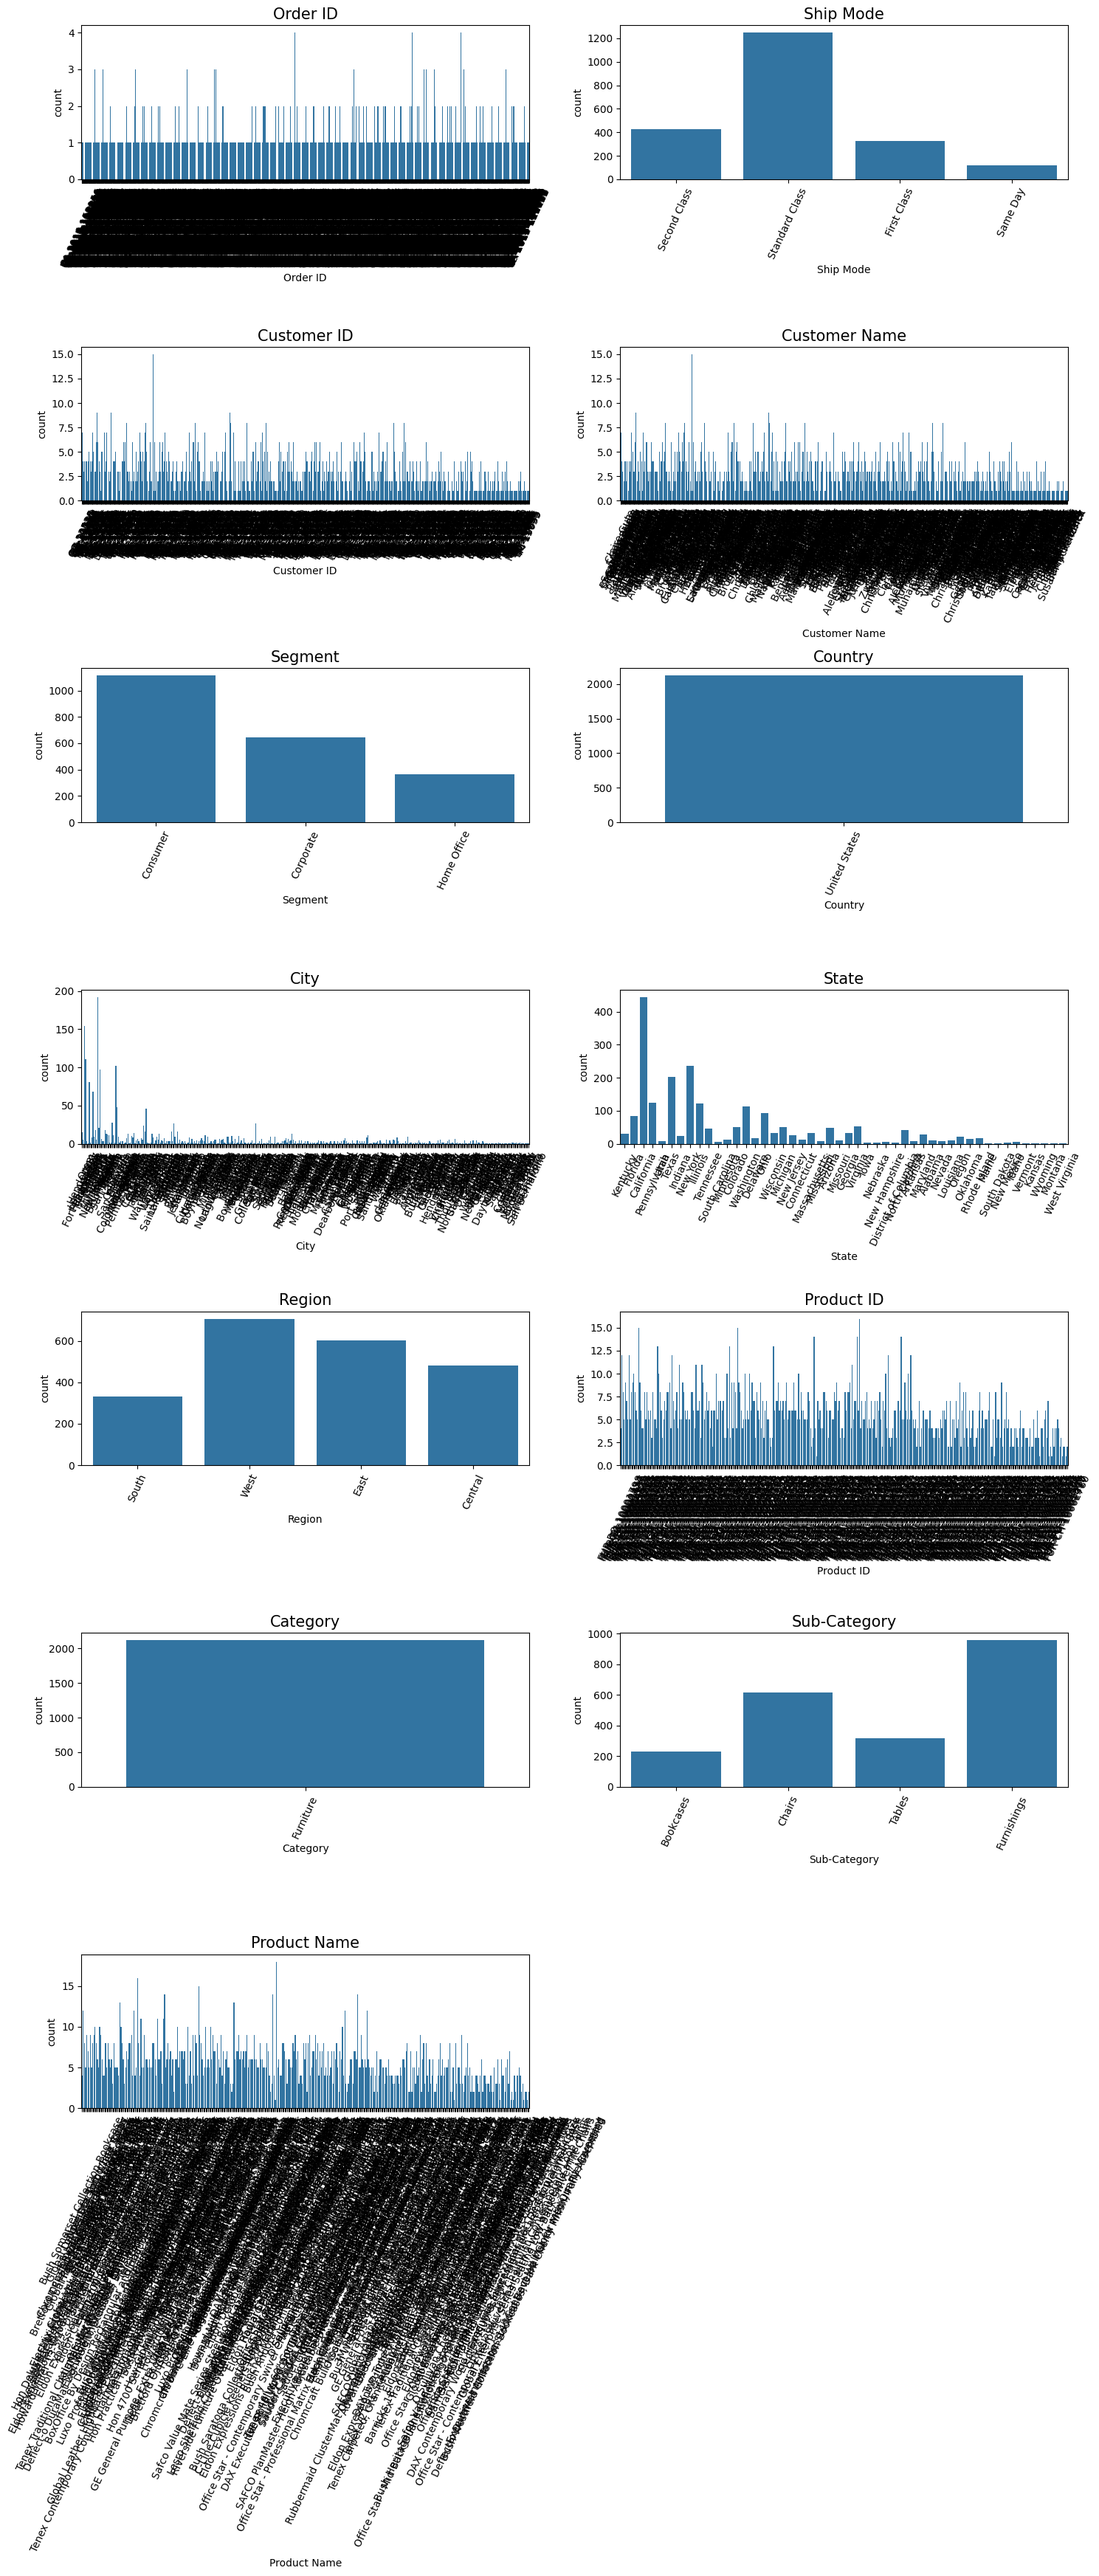

In [ ]:
# Biểu diễn dữ liệu gốc
# Vẽ biểu đồ cột
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Lấy danh sách các cột kiểu object
object_cols = df.select_dtypes(include='object').columns
num_plots = len(object_cols)
# Đếm số lượng cột kiểu object
print("Số lượng cột kiểu object:", num_plots)
# Tính số hàng và cột phù hợp
cols = 2
rows = math.ceil(num_plots / cols)
# Vẽ biểu đồ cho từng cột kiểu object
plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(object_cols, 1):
    plt.subplot(rows, cols, i)
    plt.xticks(rotation=65, size=10)
    sns.countplot(data=df, x=col)
    plt.title(col, size=15)



plt.tight_layout()
plt.show()

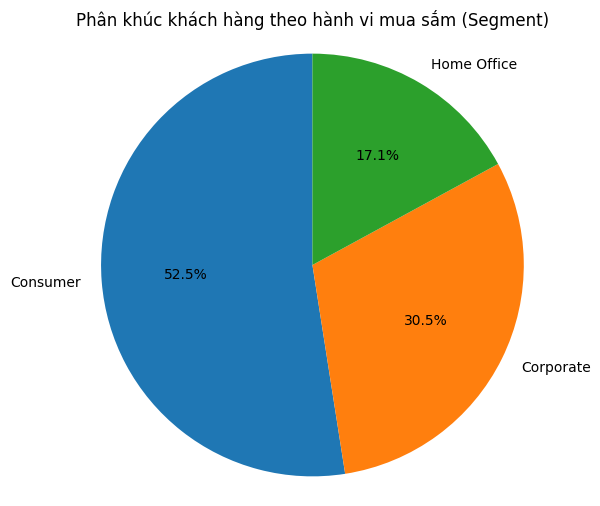

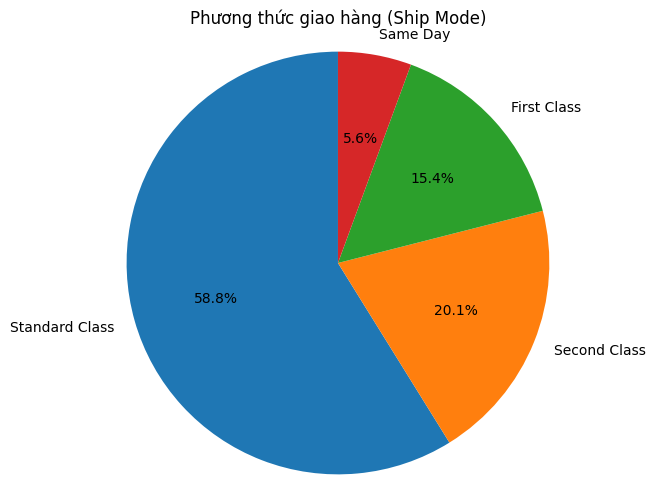

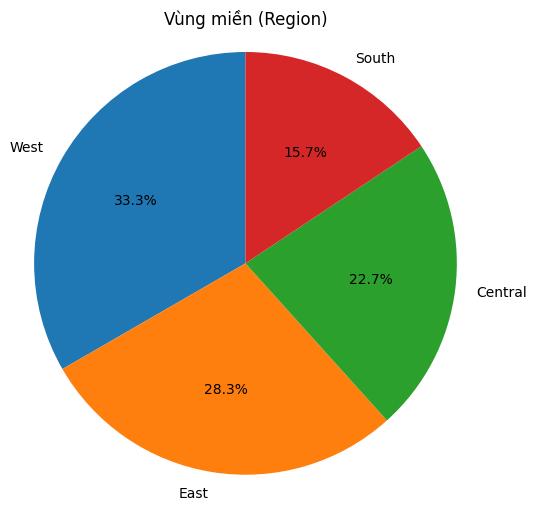

In [ ]:
#Vẽ biểu đồ tròn cho cột 'Segment'
import matplotlib.pyplot as plt
# Đếm số lượng khách hàng theo phân khúc (Segment)
segment_counts = df['Segment'].value_counts()
# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân khúc khách hàng theo hành vi mua sắm (Segment)')
plt.axis('equal')
plt.show()
#Vẽ biểu đồ tròn cho cột 'Ship Mode'
# Đếm số lượng khách hàng theo phương thức giao hàng (Ship Mode)
ship_mode_counts = df['Ship Mode'].value_counts()
# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phương thức giao hàng (Ship Mode)')
plt.axis('equal')
plt.show()
#Vẽ biểu đồ tròn cho cột 'Region'
# Đếm số lượng khách hàng theo vùng miền (Region)
region_counts = df['Region'].value_counts()
# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Vùng miền (Region)')
plt.axis('equal')
plt.show()

In [7]:
# Tiền xử lý dữ liệu
# Xóa cột: RowID, Country, Category

df.drop(['Row ID', 'Country', 'Category'], axis=1, inplace=True)
print("Danh sách cột sau khi xóa:")
print(df.columns)

Danh sách cột sau khi xóa:
Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')


In [8]:
# Xử lý dữ liệu không nhất quán (chuyển về định dạng datetime)
# Chuyển các cột ngày về kiểu datetime theo định dạng gốc MM/DD/YYYY
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=False)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce', dayfirst=False)
# Hiển thị định dạng ngày dưới dạng dd/mm/yyyy
print(df['Order Date'].dt.strftime('%d/%m/%Y').head())
print(df['Ship Date'].dt.strftime('%d/%m/%Y').head())

0    08/11/2016
1    08/11/2016
2    11/10/2015
3    09/06/2014
4    09/06/2014
Name: Order Date, dtype: object
0    11/11/2016
1    11/11/2016
2    18/10/2015
3    14/06/2014
4    14/06/2014
Name: Ship Date, dtype: object


In [9]:
# Tính toán giá trị RFM
from datetime import datetime
# Lấy ngày tính toán là ngày hiện tại
tt_date = pd.to_datetime(datetime.today())
# Gộp nhóm theo CustomerID
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (tt_date - x.max()).days,  # Recency
    'Customer ID': 'count',                             # Frequency
    'Sales': 'sum'})                                      # Monetary
# Đổi tên cột
rfm.columns = ['Recency', 'Frequency', 'Monetary']
df = df.merge(rfm, on='Customer ID', how='left')
# Hiển thị kết quả
print("Dữ liệu sau tính toán RFM:")
print(df.head())
print(df.shape)

Dữ liệu sau tính toán RFM:
         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Customer Name   Segment             City       State  Postal Code  ...  \
0      Claire Gute  Consumer        Henderson    Kentucky        42420  ...   
1      Claire Gute  Consumer        Henderson    Kentucky        42420  ...   
2   Sean O'Donnell  Consumer  Fort Lauderdale     Florida        33311  ...   
3  Brosina Hoffman  Consumer      Los Angeles  California        90032  ...   
4  Brosina Hoffman  Consumer      Los Angeles  California        90032  ...   

        Product ID Sub-Category  \
0  FUR-BO-10001798    Bookcases   
1

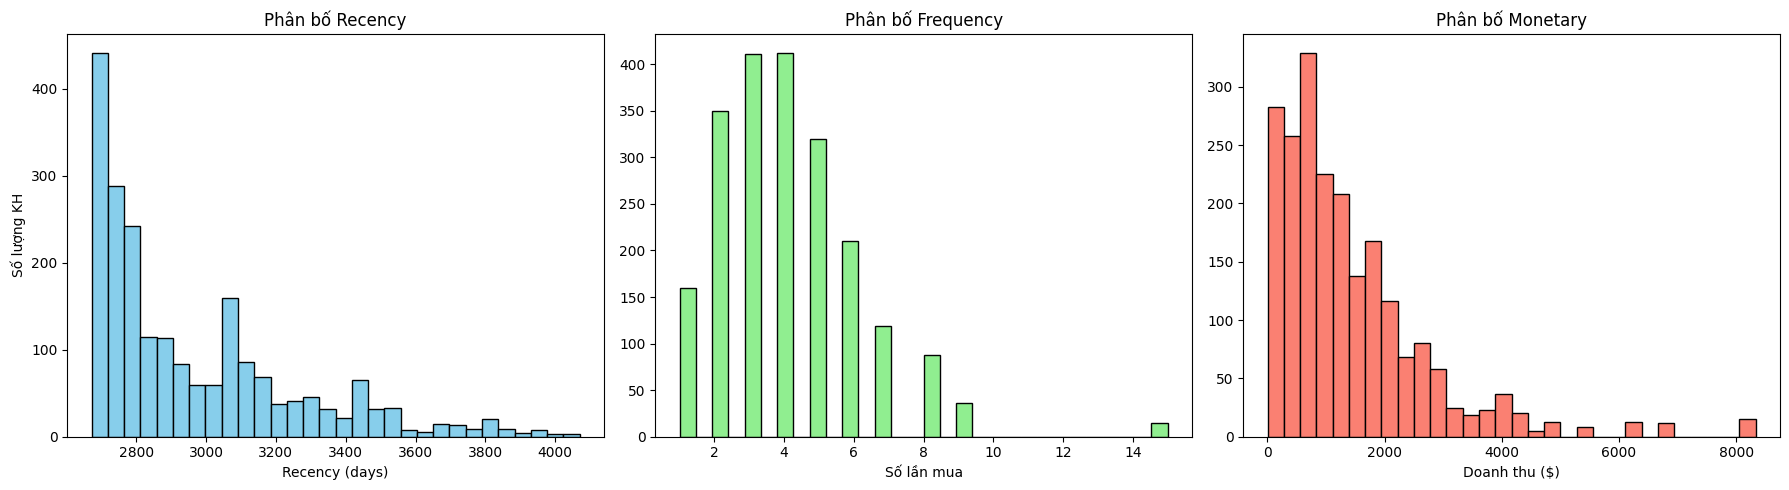

In [10]:
#Phân tích đặc trưng hành vi
# Vẽ biểu đồ Histogram cho cột Recency, Frequency, Monetary
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
plt.hist(df['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Phân bố Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Số lượng KH')

# Frequency
plt.subplot(1, 3, 2)
plt.hist(df['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Phân bố Frequency')
plt.xlabel('Số lần mua')

# Monetary
plt.subplot(1, 3, 3)
plt.hist(df['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.title('Phân bố Monetary')
plt.xlabel('Doanh thu ($)')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Doanh thu ($)')

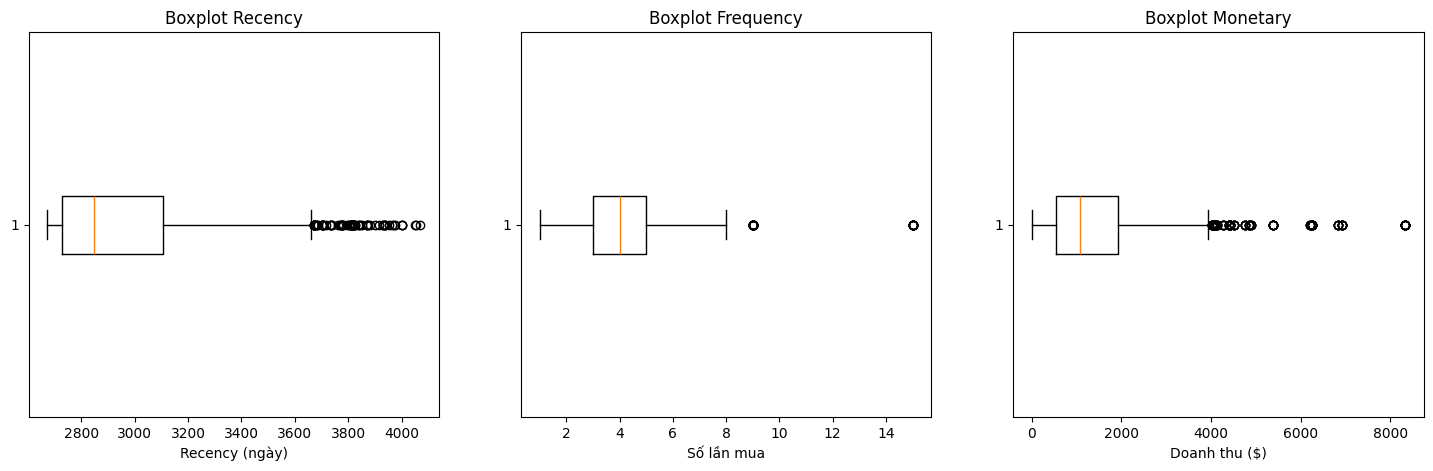

In [11]:
# Vẽ biểu đồ Boxplot cho cột Recency, Frequency, Monetary
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df['Recency'], vert=False)
plt.title('Boxplot Recency')
plt.xlabel('Recency (ngày)')
plt.subplot(1, 3, 2)
plt.boxplot(df['Frequency'], vert=False)
plt.title('Boxplot Frequency')
plt.xlabel('Số lần mua')  
plt.subplot(1, 3, 3)
plt.boxplot(df['Monetary'], vert=False)
plt.title('Boxplot Monetary')
plt.xlabel('Doanh thu ($)')

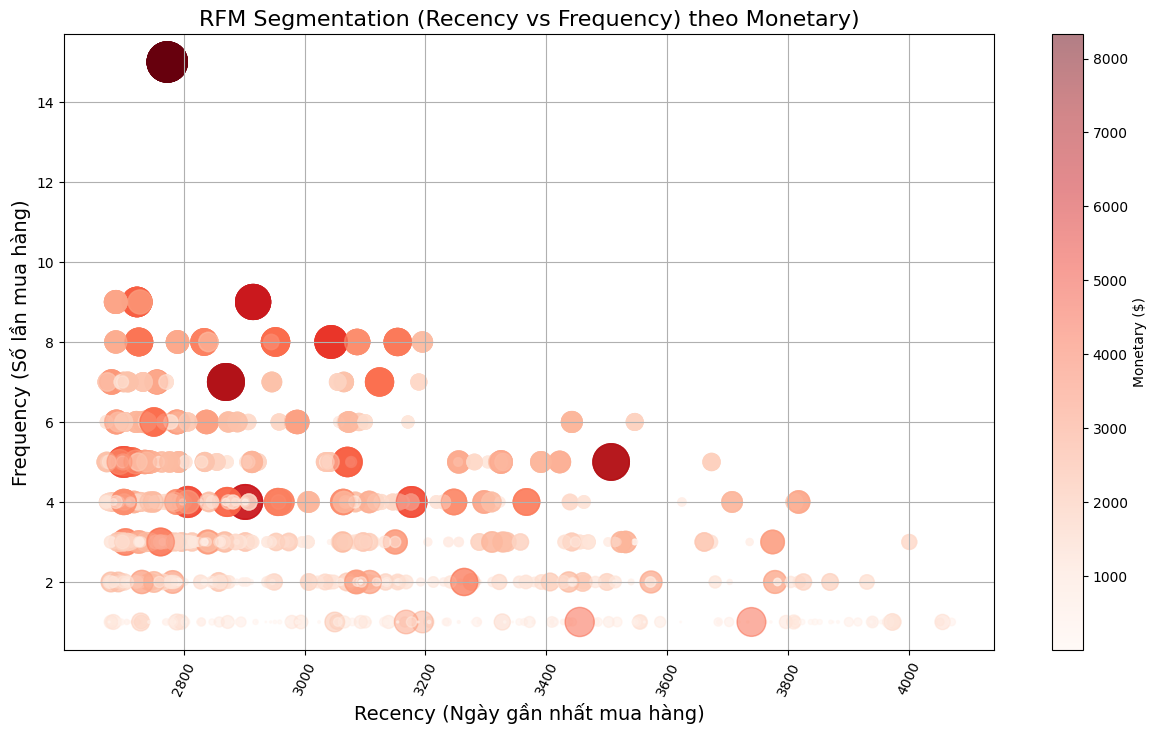

In [12]:
#Vẽ biểu đồ phân tán (Scatter plot) cho Recency và Frequency, Monetary
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kích thước và font
plt.figure(figsize=(15, 8))
plt.xticks(rotation=65, size=10)

# Vẽ biểu đồ scatter: màu sắc và kích thước dựa trên Monetary
plot = plt.scatter(
    df['Recency'], 
    df['Frequency'], 
    c=df['Monetary'],                  
    s=df['Monetary'] / 10,             
    alpha=0.5, 
    cmap='Reds'
)
plt.colorbar(plot, label='Monetary ($)')

# Nhãn và tiêu đề
plt.xlabel('Recency (Ngày gần nhất mua hàng)', size=14)
plt.ylabel('Frequency (Số lần mua hàng)', size=14)
plt.title('RFM Segmentation (Recency vs Frequency) theo Monetary)', size=16)
plt.grid(True)
plt.show()

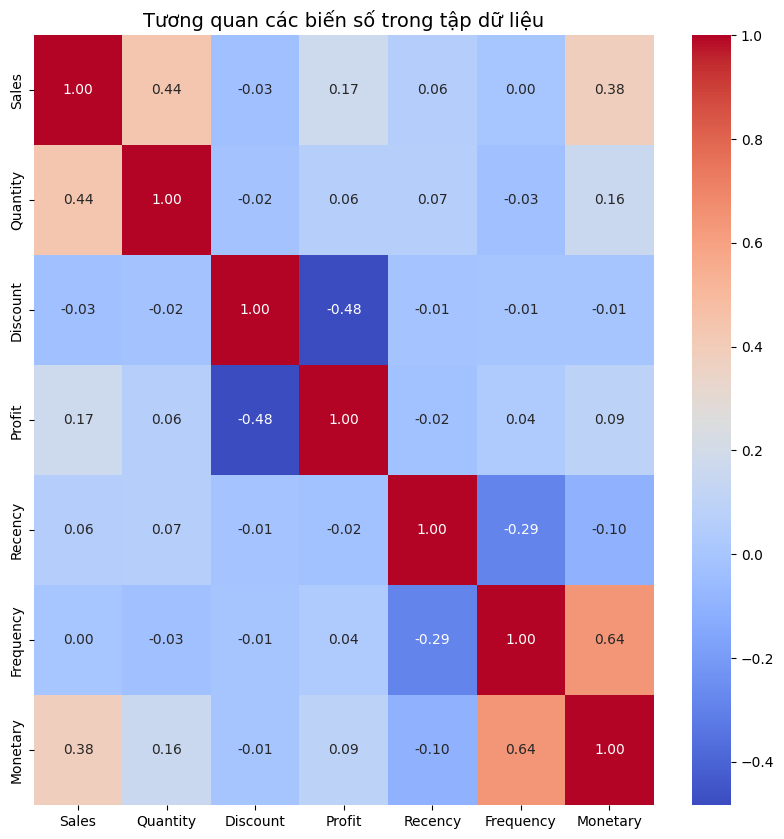

In [13]:
#Vẽ biểu đồ Heatmap

# Bước 1: Tính toán ma trận tương quan (chỉ lấy các cột số)
corr = df.select_dtypes(include='number').drop(columns=['Postal Code'], errors='ignore').corr()
# Bước 2: Vẽ heatmap tương quan
plt.figure(figsize=(10, 10))
plt.title('Tương quan các biến số trong tập dữ liệu', fontsize=14)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [14]:
#Xử lý các giá trị ngoại lai
# Dùng IQR để phát hiện ngoại lai
columns = ['Recency', 'Frequency', 'Monetary']

# Khởi tạo DataFrame lưu thông tin ngoại lai
outlier_info = pd.DataFrame(index=df.index)

# Phát hiện ngoại lai và xóa các dòng có ngoại lai
for col in columns:
    Q1 = df[col].quantile(0.25)  # Q1 (tứ phân vị thứ nhất)
    Q3 = df[col].quantile(0.75)  # Q3 (tứ phân vị thứ ba)
    IQR = Q3 - Q1  # Khoảng cách IQR

    # Tính các ngưỡng dưới và trên dựa trên IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Đánh dấu ngoại lai
    outlier_info[col + '_isoutlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)

    # In thông tin về ngoại lai
    print(f"Cột '{col}':")
    print(f" - Q1: {Q1:.2f}")
    print(f" - Q3: {Q3:.2f}")
    print(f" - IQR: {IQR:.2f}")
    print(f" - Ngưỡng dưới: {lower_bound:.2f}")
    print(f" - Ngưỡng trên: {upper_bound:.2f}")
    print(f" - Số lượng ngoại lai: {outlier_info[col + '_isoutlier'].sum()}")

# Lọc ra các dòng có ít nhất 1 giá trị ngoại lai
outliers_detected = outlier_info.any(axis=1)

# Xóa ngoại lai
df = df[~outliers_detected]


Cột 'Recency':
 - Q1: 2729.00
 - Q3: 3106.00
 - IQR: 377.00
 - Ngưỡng dưới: 2163.50
 - Ngưỡng trên: 3671.50
 - Số lượng ngoại lai: 81
Cột 'Frequency':
 - Q1: 3.00
 - Q3: 5.00
 - IQR: 2.00
 - Ngưỡng dưới: 0.00
 - Ngưỡng trên: 8.00
 - Số lượng ngoại lai: 51
Cột 'Monetary':
 - Q1: 547.81
 - Q3: 1924.35
 - IQR: 1376.54
 - Ngưỡng dưới: -1517.01
 - Ngưỡng trên: 3989.16
 - Số lượng ngoại lai: 112


[[ 0.6328776  -0.52193775 -0.09037762]
 [ 0.6328776  -0.52193775 -0.09037762]
 [-0.94037405  1.72704318  0.75797365]
 ...
 [-0.40108933 -0.52193775 -0.99653207]
 [-0.23889844  0.04030748 -0.14213019]
 [-0.99308609  0.04030748 -0.37485824]]


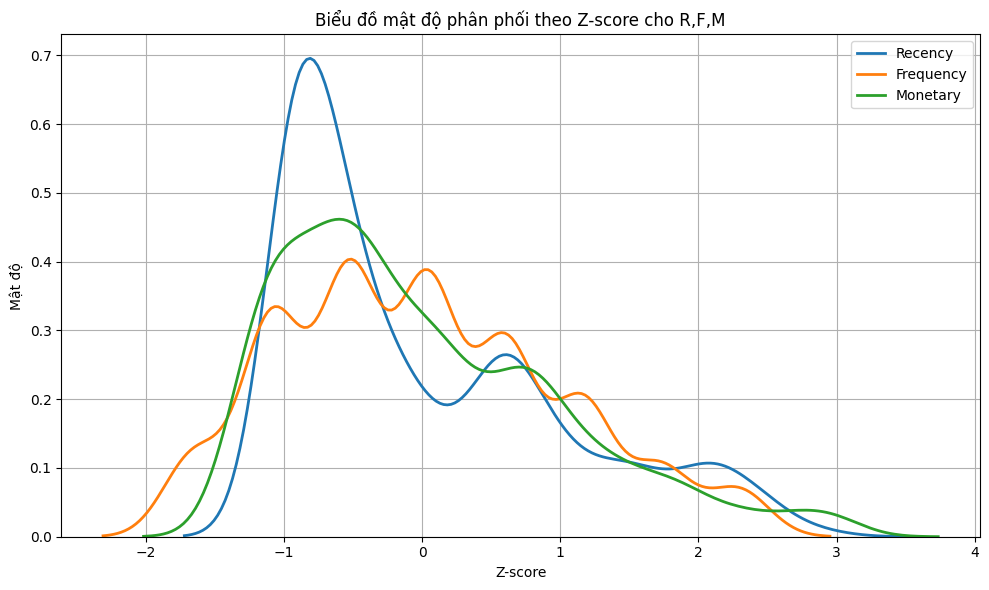

In [15]:
# Chuẩn hóa dữ liệu

import seaborn as sns
from scipy import stats
rfm_columns = ['Recency', 'Frequency', 'Monetary']

# Chuẩn hóa bằng Z-score cho các cột RFM
df_zscore = df[rfm_columns].apply(lambda x: stats.zscore(x, nan_policy='omit'))
print(df_zscore.values)
# Vẽ biểu đồ mật độ phân phối theo Z-score
plt.figure(figsize=(10, 6))
for col in df_zscore.columns:
    sns.kdeplot(df_zscore[col], label=col, linewidth=2)

plt.title("Biểu đồ mật độ phân phối theo Z-score cho R,F,M")
plt.xlabel("Z-score")
plt.ylabel("Mật độ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

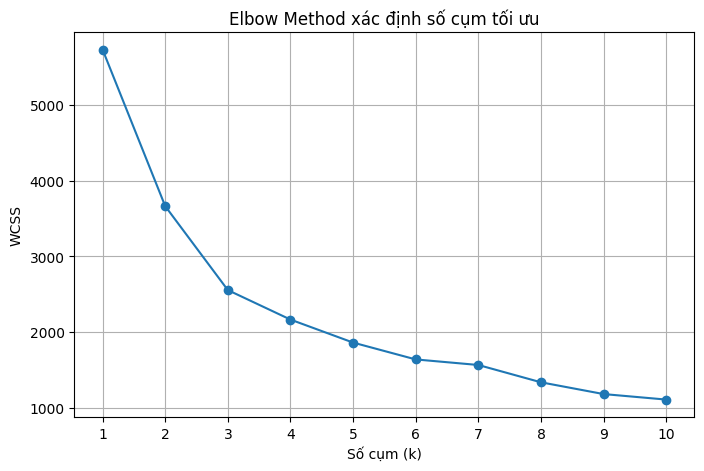

In [16]:
# Elbow để xác định số K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
wcss = []  # within-cluster sum of squares
# Thử K từ 1 đến 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_zscore)
    wcss.append(kmeans.inertia_)
# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method xác định số cụm tối ưu')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [17]:
# Phân cụm KMeans
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Khởi tạo mô hình KMeans với 3 cụm
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df_zscore)

# Gán nhãn cụm vào df_score
df_zscore['Cluster'] = kmeans.labels_
print(df_zscore.head())


    Recency  Frequency  Monetary  Cluster
0  0.632878  -0.521938 -0.090378        2
1  0.632878  -0.521938 -0.090378        2
2 -0.940374   1.727043  0.757974        0
5 -0.380815  -0.521938 -0.953082        1
6  0.296332   0.040307  1.107550        0


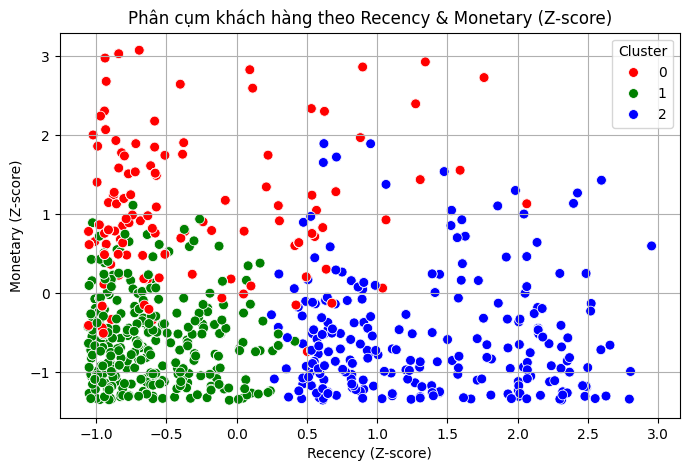

In [18]:
#Trực quan hóa kết quả phân cụm bằng biểu đồ 2D
# Định nghĩa màu sắc 
cluster_colors = {0: 'red', 1: 'green', 2: 'blue'}
# Trực quan hóa kết quả
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_zscore,
    x='Recency',
    y='Monetary',
    hue='Cluster',  # Phân biệt theo cụm
    palette=cluster_colors,  # Sử dụng màu sắc đồng nhất cho các cụm
    s=50  # Kích thước điểm
)
plt.title('Phân cụm khách hàng theo Recency & Monetary (Z-score)')
plt.xlabel('Recency (Z-score)')
plt.ylabel('Monetary (Z-score)')
plt.grid(True)
plt.show()

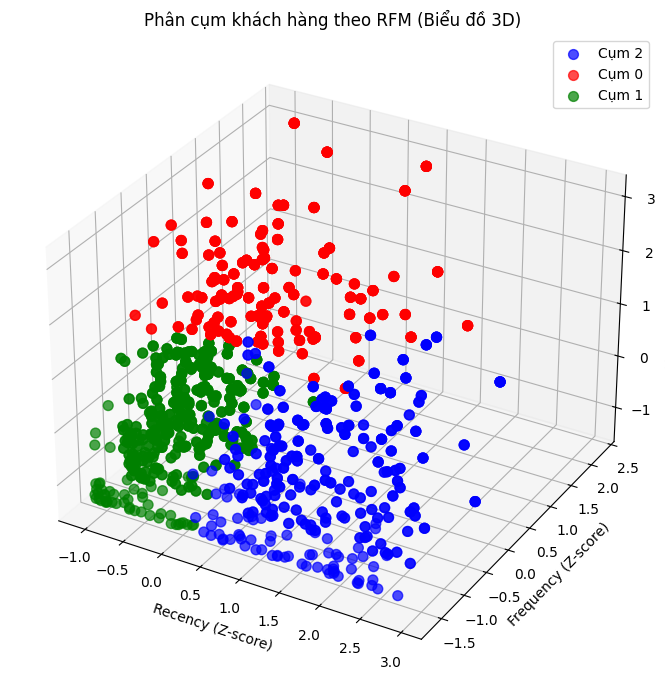

In [19]:
#Trực quan kết quả phân cụm bằng biểu đồ 3D

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Gán nhãn cụm
df_zscore['Cluster'] = kmeans.labels_

# Tạo figure 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ từng cụm bằng màu sắc khác nhau
colors = ['red', 'green', 'blue']
for cluster in df_zscore['Cluster'].unique():
    cluster_data = df_zscore[df_zscore['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Recency'],
        cluster_data['Frequency'],
        cluster_data['Monetary'],
        s=50,
        c=colors[cluster],
        label=f'Cụm {cluster}',
        alpha=0.7
    )

ax.set_title('Phân cụm khách hàng theo RFM (Biểu đồ 3D)')
ax.set_xlabel('Recency (Z-score)')
ax.set_ylabel('Frequency (Z-score)')
ax.set_zlabel('Monetary (Z-score)')
ax.legend()
plt.tight_layout()
plt.show()